In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [3]:
df.tail()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187
349,50,50,72,69.44,1,1,v New Zealand,Manchester,09/07/2019,ODI # 4190


In [14]:
#data cleaning
df['opposition'] = df['opposition'].str.replace('v', '', regex=False)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [20]:
df.drop(columns='odi_number',inplace=True)


KeyError: "['odi_number'] not found in axis"

In [ ]:
#Creating not out
df['score'] = df['score'].apply(str)
df['Not out'] = np.where(df['score'].str.endswith('*'),1,0)
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,Not out
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,0


In [27]:
# select runs_scored for rows where score is not 'DNB' or 'TDNB'
df_new = df.loc[(df['score'] != 'DNB') & (df['score'] != 'TDNB'), 'runs_scored':]
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,Not out
0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,0


In [30]:
#fix data types
df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)

In [31]:
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,Not out
0,0,1,0.00,0,0,Bangladesh,Chattogram,23/12/2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,27/12/2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,0


In [35]:
# ensure 'date' is a datetime (dates are in DD/MM/YYYY format)
df_new['date'] = pd.to_datetime(df_new['date'], dayfirst=True)

# get earliest match date and format it
first_match_date = df_new['date'].min().strftime('%B, %d, %Y')
print(first_match_date)

last_match_date = df_new['date'].max().strftime ('%B, %d, %Y')
print(last_match_date)

December, 23, 2004
July, 09, 2019


In [48]:
number_of_matches = df.shape[0]
print("number_of_matches: ", number_of_matches)

num_of_innings = df_new.shape[0]
print("num_of_innings: ", num_of_innings)

not_outs = df_new['Not out'].sum()
print("No od Not outs: ", not_outs)

runs_scored = df_new['runs_scored'].sum()
print("runs_scored: ", runs_scored)

ball_faced = df_new['balls_faced'].sum()
print("balls_faced: ", ball_faced)

career_stk = (runs_scored/ ball_faced)*100
print("Career Strike rate: ", career_stk)

career_avg = np.round((runs_scored/(num_of_innings-not_outs)),2)
print("Career avarage: ",career_avg)

hundereds = (df_new['runs_scored']>=100).sum()
print("No. of Hundreds: ",hundereds)

Fifties = ((df_new['runs_scored']>=50) & (df_new['runs_scored']<=100)).sum()
print("No. of Hundreds: ",Fifties)

number_of_matches:  350
num_of_innings:  297
No od Not outs:  84
runs_scored:  10773
balls_faced:  12303
Career Strike rate:  87.56400877834675
Career avarage:  50.58
No. of Hundreds:  10
No. of Hundreds:  73


opposition
Netherlands      1
Scotland         1
Bermuda          1
U.A.E.           1
Ireland          2
Hong Kong        2
Afghanistan      2
Africa XI        3
Zimbabwe         6
Bangladesh      21
New Zealand     28
Pakistan        36
South Africa    37
West Indies     39
England         48
Australia       55
Sri Lanka       67
Name: count, dtype: int64


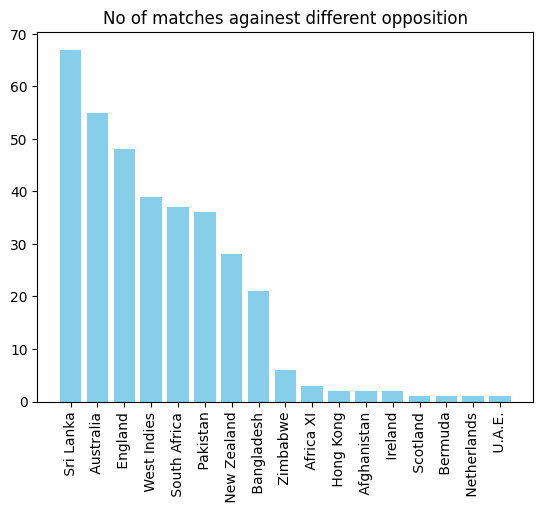

In [71]:
#Matches against different oppositions
opposition_count = df['opposition'].value_counts()
opposition_count_sort = opposition_count.sort_values()
print(opposition_count_sort)

#Matplotlib bar plot
plt.Figure(figsize=(8,5))
plt.bar(opposition_count.index, opposition_count.values, color = 'skyblue')
plt.title("No of matches againest different opposition")
plt.xticks(rotation=90)
plt.show()



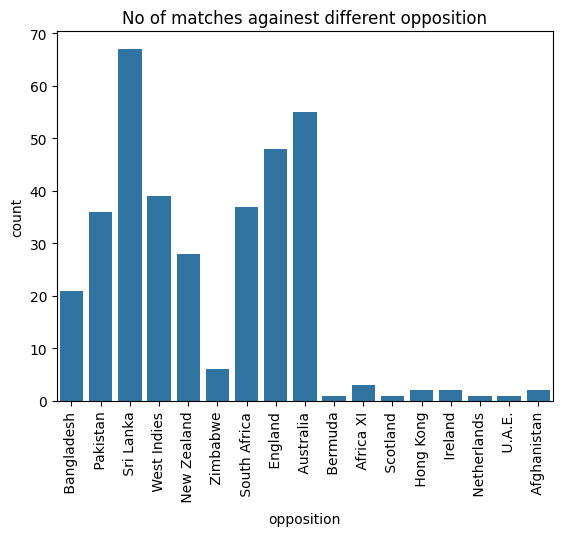

In [76]:
#seaborn version
sns.countplot(x='opposition', data = df)
plt.title("No of matches againest different opposition")
plt.xticks(rotation=90)
plt.show()

plt.show()

       opposition  runs_scored
0       Sri Lanka         2383
1       Australia         1660
2         England         1546
3        Pakistan         1231
4     West Indies         1005
5     New Zealand          940
6    South Africa          830
7      Bangladesh          569
8        Zimbabwe          208
9       Africa XI          174
10      Hong Kong          109
11    Afghanistan           36
12        Ireland           34
13        Bermuda           29
14    Netherlands           19


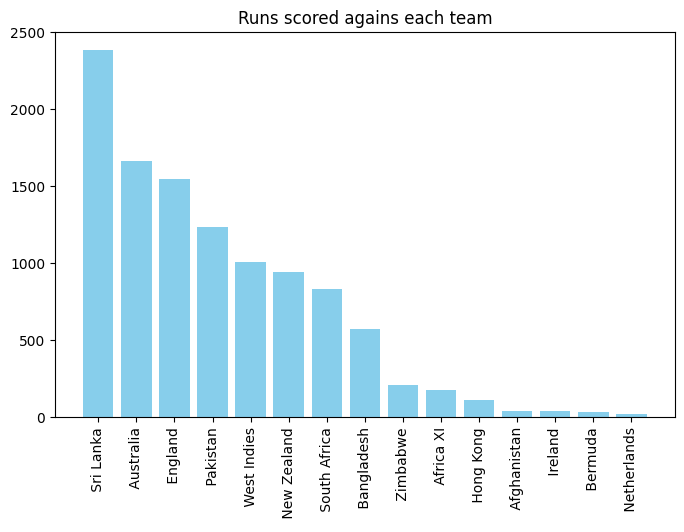

In [65]:
#Runs scored agains each team
run_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
run_scored_by_opposition_sort = run_scored_by_opposition.sort_values(by='runs_scored', ascending=False).reset_index(drop=True)
print(run_scored_by_opposition_sort)

#Matplotlib
plt.figure(figsize=(8,5))
plt.bar(run_scored_by_opposition_sort['opposition'], run_scored_by_opposition_sort['runs_scored'], color='skyblue')
plt.title("Runs scored agains each team")
plt.xticks(rotation=90)
plt.show()